In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif, chi2
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

# #1 Introduction
The dataset I am utilizing is about car prices and their details. Below is a list of the features for each row:
- ID (Identifier)
- Price (How much it costs)
- Levy (How much it will pay off tax debt if seized from the person)
- Manufacturer (Who made it)
- Model (What type of car from Manufacturer)
- Prod. Year (What year it was produced)
- Category (What type of car overall)
- Leather Interior (Whether or not it has leather interior)
- Fuel Type (What type of fuel it takes to run the car)
- Engine volume (What size the engine is along with whether or not it is Turbo)
- Cylinders (How many cylinders the engine has)
- Gear box type (What type of gear box)
- Drive wheels (Which wheels are the ones that move the car forcefully)
- Doors (What kind of doors there are)
- Wheel (Where the wheel is placed within the car, left or right)
- Color (Color of the car)

The target variable I have is selling price, as many of the factors above impact how much a car is worth.

The prediction goal I have is: <b>“What factors above in car details correlate to and impact car selling price?”

In [41]:
# 1 Loading dataset
df = pd.read_csv('car_price_prediction.csv')
print("Overview of dataset\n")
print(df.info())
df = df.rename(columns={'Price': 'target'})
df

Overview of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             1

,ID,target,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [42]:
# 2 Dropping null values of each column
df = df.dropna(axis=0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   target            19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [43]:
# 2 Checking column 'ID', 'Model' for amount of unique values.
print(df['ID'].value_counts())
print()
print(df['Model'].value_counts())

45815365    8
45815361    8
45815363    7
45815368    7
45723475    7
           ..
45774312    1
45732621    1
45773011    1
45774019    1
45813273    1
Name: ID, Length: 18924, dtype: int64

Prius                    1083
Sonata                   1079
Camry                     938
Elantra                   922
E 350                     542
                         ... 
Feroza                      1
C-MAX C-MAX                 1
X1 4X4                      1
Land Cruiser Prado RX       1
Prius C aqua                1
Name: Model, Length: 1590, dtype: int64


In [44]:
# 2 Dropping column 'ID', 'Levy', 'Model' (too many unique values or irrelevant feature)
df = df.drop(['ID','Levy','Model'],axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   target            19237 non-null  int64  
 1   Manufacturer      19237 non-null  object 
 2   Prod. year        19237 non-null  int64  
 3   Category          19237 non-null  object 
 4   Leather interior  19237 non-null  object 
 5   Fuel type         19237 non-null  object 
 6   Engine volume     19237 non-null  object 
 7   Mileage           19237 non-null  object 
 8   Cylinders         19237 non-null  float64
 9   Gear box type     19237 non-null  object 
 10  Drive wheels      19237 non-null  object 
 11  Doors             19237 non-null  object 
 12  Wheel             19237 non-null  object 
 13  Color             19237 non-null  object 
 14  Airbags           19237 non-null  int64  
dtypes: float64(1), int64(3), object(11)
memory usage: 2.2+ MB
None


In [45]:
# 2 Removing duplicates
print("Shape before deduplication:",df.shape[0])
df = df.drop_duplicates(keep='first')
print("Shape after deduplication:",df.shape[0])

Shape before deduplication: 19237
Shape after deduplication: 15707


# (Code below for engine volume and doors taken from Ahmet Calis's Car Price Prediction overview, as I found out from him that I should probably put Turbo as a seperate column) Link to code overview: https://www.kaggle.com/code/ahmetcalis/car-price-prediction

In [46]:
# 2 Checking engine volume's values
df['Engine volume'].value_counts()

2            3313
2.5          1652
1.8          1536
1.5          1234
1.6          1221
             ... 
7.3             1
0.2 Turbo       1
6.8             1
6.7             1
1.1 Turbo       1
Name: Engine volume, Length: 107, dtype: int64

In [47]:
# 2 Making sure that we dont miss anything so making everything lower first
df['Engine volume'] = df['Engine volume'].str.lower()

# 2 Finding the rows which has turbo in them and assigning the results to new column Turbo. 
df['Turbo'] = df['Engine volume'].str.contains('turbo')

# 2 Slicing engine volumes and converting type to float
df['Engine volume'] = df['Engine volume'].str.slice(0,3)
df['Engine volume'] = df['Engine volume'].astype('float64')

print(df['Engine volume'].value_counts())
print(df['Turbo'].value_counts())

2.0    3716
2.5    1743
1.8    1711
1.6    1337
1.5    1299
       ... 
0.5       1
7.3       1
3.1       1
5.2       1
5.8       1
Name: Engine volume, Length: 65, dtype: int64
False    13822
True      1885
Name: Turbo, dtype: int64


In [48]:
# 2 Replacing door values with numbers
df['Doors'].replace({'04-May':4, '02-Mar':2, '>5':5}, inplace=True)
df['Doors'].value_counts()

4    14838
2      745
5      124
Name: Doors, dtype: int64

In [49]:
# 2 Replacing mileage values with numbers.
df['Mileage'] = df['Mileage'].replace("km","", regex=True)
df['Mileage'] = pd.to_numeric(df['Mileage'])
print(df['Mileage'].value_counts())
print(df['Mileage'].isnull().sum())

0         608
200000    181
150000    156
160000    119
180000    115
         ... 
104200      1
120455      1
147790      1
25038       1
186923      1
Name: Mileage, Length: 7687, dtype: int64
0


In [50]:
# 2 Gathering information on value counts for each categorical feature with more than 5-6 values. (see which rows or columns to drop based on unique values)
print(df['Color'].value_counts())
print(df['Category'].value_counts())
print(df['Gear box type'].value_counts())
print(df['Manufacturer'].value_counts())
print(df['Fuel type'].value_counts())

Black            3831
White            3606
Silver           3143
Grey             1918
Blue             1245
Red               567
Green             288
Orange            204
Carnelian red     177
Brown             172
Golden            142
Beige             134
Sky blue          122
Yellow             94
Purple             39
Pink               25
Name: Color, dtype: int64
Sedan          7003
Jeep           4217
Hatchback      2546
Minivan         534
Coupe           475
Universal       311
Microbus        295
Goods wagon     229
Pickup           51
Cabriolet        35
Limousine        11
Name: Category, dtype: int64
Automatic    10077
Tiptronic     3061
Manual        1837
Variator       732
Name: Gear box type, dtype: int64
HYUNDAI          3048
TOYOTA           2859
MERCEDES-BENZ    1449
CHEVROLET         968
FORD              956
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: Manufacturer, L

In [51]:
# 2 Dropping manufacturer and color due to too many unique values.
df = df.drop(['Manufacturer','Color'],axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15707 entries, 0 to 19236
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   target            15707 non-null  int64  
 1   Prod. year        15707 non-null  int64  
 2   Category          15707 non-null  object 
 3   Leather interior  15707 non-null  object 
 4   Fuel type         15707 non-null  object 
 5   Engine volume     15707 non-null  float64
 6   Mileage           15707 non-null  int64  
 7   Cylinders         15707 non-null  float64
 8   Gear box type     15707 non-null  object 
 9   Drive wheels      15707 non-null  object 
 10  Doors             15707 non-null  int64  
 11  Wheel             15707 non-null  object 
 12  Airbags           15707 non-null  int64  
 13  Turbo             15707 non-null  bool   
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 1.7+ MB
None


In [52]:
# 2 Dropping hydrogen and merging plug-in hybrid to hybrid.
df = df.drop(df[df['Fuel type'] == 'Hydrogen'].index, axis=0)
df = df.replace('Plug-in Hybrid','Hybrid')
print(df['Fuel type'].value_counts())

Petrol    8817
Diesel    3206
Hybrid    2504
LPG        714
CNG        465
Name: Fuel type, dtype: int64


In [53]:
# 2 Transforming categorical variables into numeric. (for ANOVA Test)
dfcategoricalnumeric = df
for column in dfcategoricalnumeric.select_dtypes(['object','bool']):
    listofvalues = dfcategoricalnumeric[column].value_counts().to_dict()
    print("\n",listofvalues)
    i = 0
    for elem in listofvalues:
        listofvalues[elem] = i
        i = i + 1
    dfcategoricalnumeric = dfcategoricalnumeric.replace(listofvalues)
    print("\n",dfcategoricalnumeric[column].value_counts())



 {'Sedan': 7002, 'Jeep': 4217, 'Hatchback': 2546, 'Minivan': 534, 'Coupe': 475, 'Universal': 311, 'Microbus': 295, 'Goods wagon': 229, 'Pickup': 51, 'Cabriolet': 35, 'Limousine': 11}

 0     7002
1     4217
2     2546
3      534
4      475
5      311
6      295
7      229
8       51
9       35
10      11
Name: Category, dtype: int64

 {'Yes': 10543, 'No': 5163}

 0    10543
1     5163
Name: Leather interior, dtype: int64

 {'Petrol': 8817, 'Diesel': 3206, 'Hybrid': 2504, 'LPG': 714, 'CNG': 465}

 0    8817
1    3206
2    2504
3     714
4     465
Name: Fuel type, dtype: int64

 {'Automatic': 10077, 'Tiptronic': 3060, 'Manual': 1837, 'Variator': 732}

 0    10077
1     3060
2     1837
3      732
Name: Gear box type, dtype: int64

 {'Front': 10979, '4x4': 2759, 'Rear': 1968}

 0    10979
1     2759
2     1968
Name: Drive wheels, dtype: int64

 {'Left wheel': 14275, 'Right-hand drive': 1431}

 0    14275
1     1431
Name: Wheel, dtype: int64

 {False: 13821, True: 1885}

 0    13821
1     

(15706, 14)


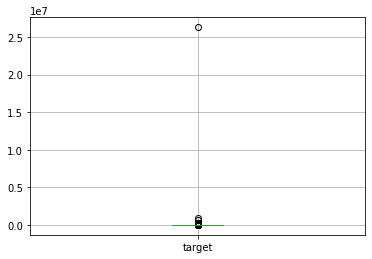

In [54]:
# 2 Checking column 'selling_price' for any outliers
df.boxplot(column='target')
print(df.shape)

(14885, 14)


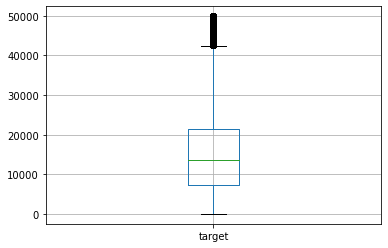

In [55]:
# 2 Dropping any outliers in 'selling_price'
df = df.loc[df['target'] <= (50000)]
df.boxplot(column=['target'])
print(df.shape)

(14028, 14)


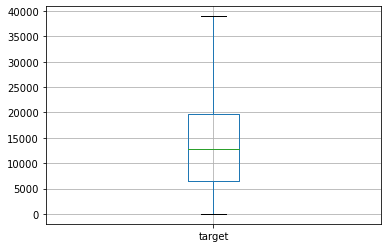

In [56]:
# 2 Dropping any outliers in 'selling_price'
df = df.loc[df['target'] <= (39000)]
df.boxplot(column=['target'])
print(df.shape)

(14028, 14)


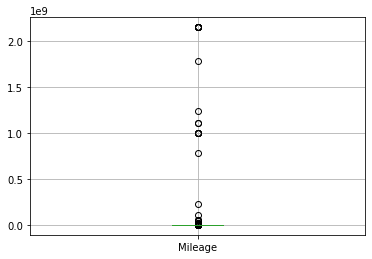

In [57]:
# 2 Checking column 'Mileage' for outliers
df.boxplot(column='Mileage')
print(df.shape)

(13996, 14)


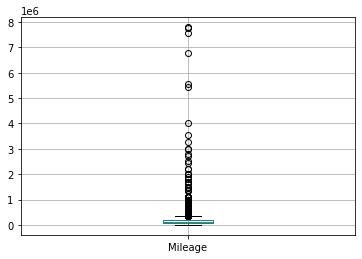

In [58]:
# 2 Dropping any outliers in 'Mileage'
df = df.loc[df['Mileage'] <= (0.01 * 1e9)]
df.boxplot(column=['Mileage'])
print(df.shape)

(13678, 14)


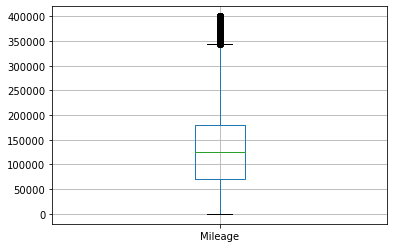

In [59]:
# 2 Dropping any outliers in 'Mileage'
df = df.loc[df['Mileage'] <= (0.4 * 1e6)]
df.boxplot(column=['Mileage'])
print(df.shape)

(13486, 14)


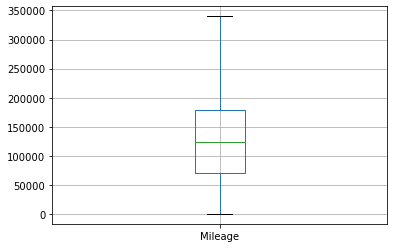

In [60]:
# 2 Dropping any outliers in 'Mileage'
df = df.loc[df['Mileage'] <= (341000)]
df.boxplot(column=['Mileage'])
print(df.shape)

In [61]:
# 3 Correlation matrix to see correlation to target variable, dropping columns with little to no correlation
corr = df.corr()
corr

,target,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,Turbo
target,1.000000,0.297918,0.060328,-0.084834,-0.008840,0.051402,-0.032300,0.148318
Prod. year,0.297918,1.000000,-0.087713,-0.219635,-0.144704,0.200028,0.325979,-0.068776
Engine volume,0.060328,-0.087713,1.000000,0.140727,0.725776,-0.025348,0.242622,-0.029249
Mileage,-0.084834,-0.219635,0.140727,1.000000,0.108323,-0.010174,-0.040647,0.034676
Cylinders,-0.008840,-0.144704,0.725776,0.108323,1.000000,-0.044223,0.201051,0.009412
Doors,0.051402,0.200028,-0.025348,-0.010174,-0.044223,1.000000,0.076988,-0.079971
Airbags,-0.032300,0.325979,0.242622,-0.040647,0.201051,0.076988,1.000000,0.029879
Turbo,0.148318,-0.068776,-0.029249,0.034676,0.009412,-0.079971,0.029879,1.000000


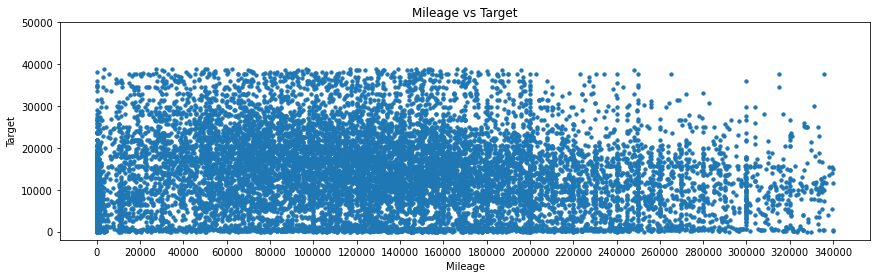

In [62]:
# 3 Checking milage via scatterplot for further correlation (as it is a common thing to look for)
dfcomparison = df.loc[:,['Mileage','target']]
dfcomparison = dfcomparison.dropna()
x = dfcomparison['Mileage']
y = dfcomparison['target']
plt.scatter(x, y,s=11.0)
plt.subplots_adjust(right=2)
plt.xlabel('Mileage')
plt.ylabel('Target')
plt.title('Mileage vs Target')
plt.yticks(np.arange(0, 60000, 10000))
plt.xticks(np.arange(0, 350000, 20000))
plt.show()

In [63]:
# 3 Dropping column 'Mileage','Cylinders','Airbags','Doors','Engine volume' (seems non-correlated)
df = df.drop(['Mileage','Cylinders','Airbags','Doors','Engine volume'],axis=1)

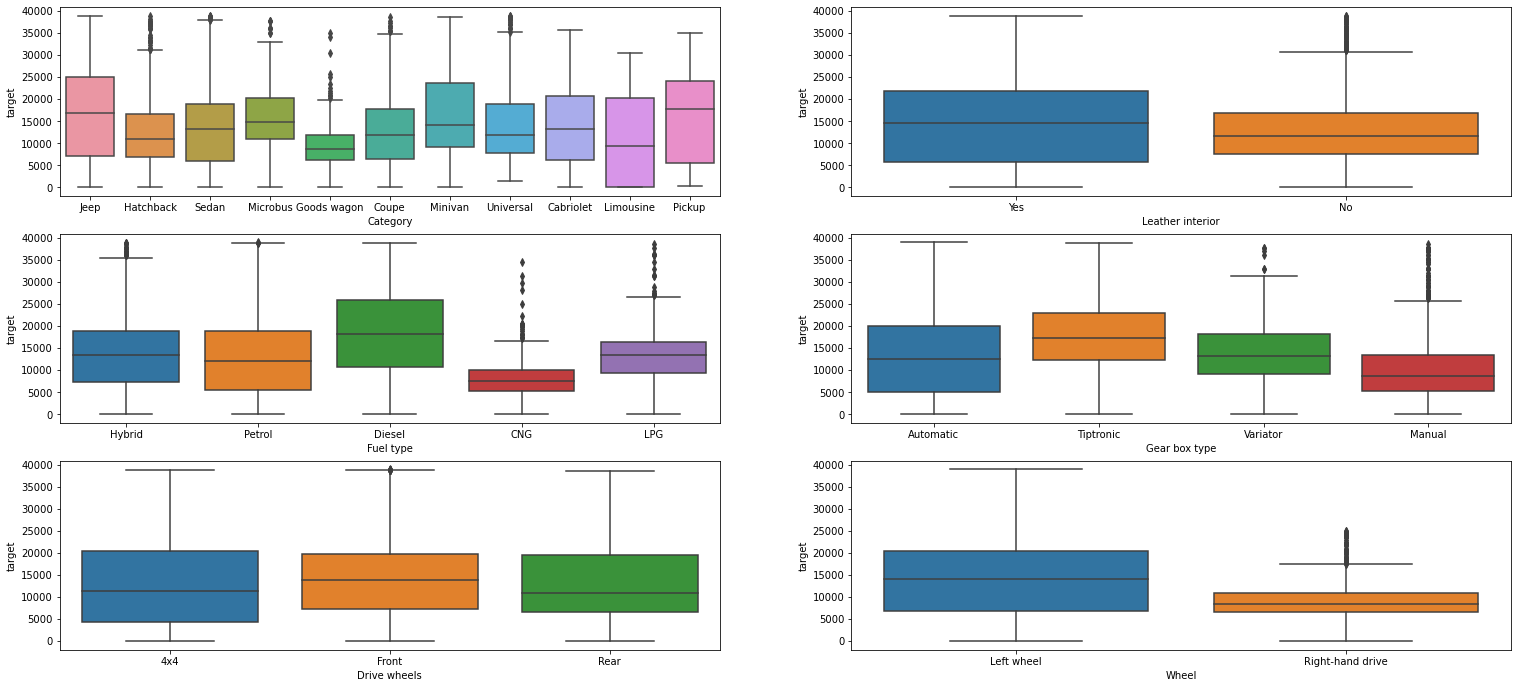

In [64]:
# 3 Grouped boxplots (categorical)
cat_list=df.select_dtypes(['object']).columns.to_list()
fig=plt.figure(figsize=(26,16))
for i in range(len(cat_list)):
    column=cat_list[i]
    sub=fig.add_subplot(4,2,i+1)
    chart=sns.boxplot(x=column, y='target', data=df)

In [65]:
# 3 ANOVA test (for categorical vs numerical target variables)
x = dfcategoricalnumeric.loc[:, cat_list]
y = dfcategoricalnumeric.loc[:, 'target']
fs = SelectKBest(score_func=f_classif, k='all')
bestFeatures = fs.fit(x, y)
np.set_printoptions(suppress = True)
print(cat_list)
print(bestFeatures.scores_)
print(bestFeatures.pvalues_)

['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel']
[1.21319953 2.75543596 0.94286038 1.95981613 1.61347499 1.79557795]
[0.        0.        0.9662016 0.        0.        0.       ]


In [67]:
# 3 Dropping features that have a p-value higher than 0.05.
df = df.drop('Drive wheels', axis=1)

In [68]:
# 3 Changing categorical variables with more than two variables to dummies (also changing the ones that are two variables to numerical)
df_dummy = pd.get_dummies(df['Fuel type'])
df_dummy2 = pd.get_dummies(df['Gear box type'])
df_dummy3 = pd.get_dummies(df['Wheel'])
df_dummy4 = pd.get_dummies(df['Category'])
column_name = df.columns.values.tolist()
column_name.remove('Fuel type')
column_name.remove('Gear box type')
column_name.remove('Wheel')
column_name.remove('Category')
dfwithdummies = df[column_name].join(df_dummy)
dfwithdummies = dfwithdummies.join(df_dummy2)
dfwithdummies = dfwithdummies.join(df_dummy3)
dfwithdummies = dfwithdummies.join(df_dummy4)
dfwithdummies['Turbo'] = dfwithdummies['Turbo'].replace({True : 1, False : 0})
dfwithdummies['Leather interior'] = dfwithdummies['Leather interior'].replace({'Yes' : 1, 'No' : 0})
print(dfwithdummies.info())
print(dfwithdummies['Turbo'].value_counts())
print(dfwithdummies['Leather interior'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13486 entries, 0 to 19236
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   target            13486 non-null  int64
 1   Prod. year        13486 non-null  int64
 2   Leather interior  13486 non-null  int64
 3   Turbo             13486 non-null  int64
 4   CNG               13486 non-null  uint8
 5   Diesel            13486 non-null  uint8
 6   Hybrid            13486 non-null  uint8
 7   LPG               13486 non-null  uint8
 8   Petrol            13486 non-null  uint8
 9   Automatic         13486 non-null  uint8
 10  Manual            13486 non-null  uint8
 11  Tiptronic         13486 non-null  uint8
 12  Variator          13486 non-null  uint8
 13  Left wheel        13486 non-null  uint8
 14  Right-hand drive  13486 non-null  uint8
 15  Cabriolet         13486 non-null  uint8
 16  Coupe             13486 non-null  uint8
 17  Goods wagon       13486 non-nul

In [69]:
# 3 Standardization or Normalization (Standardization due to year and target being differing ranges)
scaler = MinMaxScaler()
dfwithdummies['Prod. year'] = scaler.fit_transform(dfwithdummies['Prod. year'].array.reshape(-1, 1))
print(dfwithdummies['Prod. year'])

0        0.876543
1        0.888889
2        0.827160
3        0.888889
4        0.925926
           ...   
19230    0.888889
19232    0.740741
19233    0.888889
19234    0.876543
19236    0.901235
Name: Prod. year, Length: 13486, dtype: float64


# #3

Correlation matrix - Showed that very little of the numeric values mattered to selling price, thus resulting in all being dropped except prod. year (at around 30%) and turbo (at around 16%).

Graphs - Showed variance between most values except for drive wheel, having around the same boxplot for each class.

ANOVA test - Showed significance for all features except drive wheels.

Variables with zero to little variance - According to boxplot, drive wheels.

Any features irrelevant to the target variable - Drive wheels.

Any high correlated features - No.



In [70]:
# 4 Does data need to be balanced? (no, target is numerical, no classes, therefore skipping step)

In [71]:
# 4 Splitting the dataset into training and testing data.
column_name = dfwithdummies.columns.values.tolist()
column_name.remove('target')
y = dfwithdummies[['target']]
x = dfwithdummies[column_name]
y_train, y_test, x_train, x_test = train_test_split(y, x, test_size = 0.2, random_state=15)

In [72]:
# 4 Building prediction model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [73]:
# 4 Metrics to evaluate prediction model
print("R-squared score from test data on linear regression model from training data:", 
      model.score(x_test, y_test))
print("\nIntercept, Coefficients")
print(model.intercept_)
print(model.coef_)

y_2 = model.predict(x)
dfwithdummies['y_predicted'] = y_2
mse = mean_squared_error(dfwithdummies['target'], dfwithdummies['y_predicted'])
print("\nMean Squared Error:",mse)

R-squared score from test data on linear regression model from training data: 0.278999346378378

Intercept, Coefficients
[-19540.49471613]
[[40779.20073085 -1024.82441988  2107.827089   -1453.20249329
   3970.66781382 -1170.8575328    148.32687701 -1494.93466474
  -2447.43201191 -2190.55489476  3524.43462932  1113.55227736
   1769.67054369 -1769.67054369   -59.4055557   -708.72208438
  -6267.7475278  -2654.48093831    26.44016926 12916.97133723
  -1760.63251069  1379.55177937   477.37751815 -2820.68180369
   -528.67038343]]

Mean Squared Error: 66186230.055041656


In [74]:
# 4 Cross validating data.
scores = cross_val_score(model, x_train, y_train, scoring='r2', cv=10)
print("R-squared score\n",scores)
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
print("\nMean scored error\n",scores*-1)

R-squared score
 [0.22273989 0.21977459 0.23787405 0.24847147 0.27536535 0.22423903
 0.25248235 0.27482388 0.28057899 0.20604299]

Mean scored error
 [69924554.30120482 68847428.9945514  68627910.90917516 64673387.39772388
 62516773.21198707 63769238.15124048 67972086.68542966 64054102.62557924
 66265580.76357129 70162344.56515436]


# #4 Conclusion
To conclude this project, the reason why I utilized multiple linear regression is because it fits the prediction goal I had in mind. It's a useful model for predicting numerical targets, and it allows for multiple variables to have an impact on that prediction. 

The prediction turned out to have an accuracy of around 24%, and had a mean-squared error of over 66 million, indicating that the model likely failed in its purpose. 

Reasons for that may be due to lackluster cleaning, poor feature selection, the wrong prediction model, or a lack of data within the dataset that has significant predicting power for price. 

Overall, the price could not be predicted accurately, and the factors at the end may or may not have a significant impact.